# Credit Scoring - Machine Learning Final Project 2023

<a id='toc'></a>
## Table of contents
* <a href='#importdata'>Import Data</a>
* <a href='#datatransformation'>Data Transformation</a>
    * <a href='#stdscl'>Standard Scaler</a>
    * <a href='#minmax'>MinMax Scaler</a>
    * <a href='#woe'>WOE</a>
* <a href='#Dealing with class imbalance'>Dealing with class imbalance</a>
    * <a href='#upsample'>Upsample</a>
    * <a href='#downsample'>Downsample</a>
    * <a href='#smote'>SMOTE</a>
* <a href='#combination'>Features Combination</a>
* <a href='#classifier'>Classifier</a>
    * <a href='#lr'>Logistic Regression</a>
    * <a href='#dt'>Decision Tree</a>
    * <a href='#rf'>Random Forest</a>

## Importing package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#importing date for labelling file
from datetime import datetime
date=datetime.today().strftime('%Y%m%d')
print('today date ', date)

plt.ioff() #prevent showing figure

def filldata(df,value):
    return df.fillna(value)

today date  20230501


#### Dictionary Variable to Store Classifier Results

In [2]:
dfclassification_result=pd.DataFrame(columns=['variable','precision','recall','f1','auc','auc+f1+prec',
                                              'data_fill','transformation','resample','classifier'])

<a id='importdata'></a>
## Importing Data
<a href='#toc'>Table of contents</a>

#### Import Training and Test Data

In [135]:
#importing training data to pandas dataframe
df=pd.read_csv(r'E:\phbs\module03\ml_finance\final_project\training.csv',index_col='id')
df=df.drop(columns=['split']) # Drop the 'split' column, which has no impact on the event
df['event'].replace({0:1, 1:0},inplace=True) # Invert the event values to give more weight to the minority class

#importing TEST data to pandas dataframe
df1=pd.read_csv(r'E:\phbs\module03\ml_finance\final_project\test.csv',index_col='id')
df1=df1.drop(columns=['split'])
df1['event'].replace({0:1, 1:0},inplace=True)

#set the target column separate from dataframe
dfy1=df1['event']
dfy=df['event'] 

#### Fill NAN Value - <font color='red'>Mean</font>

In [136]:
fillvalue=df.mean()
data_fill='mean'

df=filldata(df,fillvalue)
df1=filldata(df1,fillvalue)

X=df.values
y=dfy.values
X1=df1.values
y1=dfy1.values

y_train=y

print('Credit Default - train %:',dfy.sum()/df.shape[0]*100)
print('Credit Default - test %:',dfy1.sum()/df1.shape[0]*100)

Credit Default - train %: 2.5255824080121925
Credit Default - test %: 2.5004605670836892


With a credit default rate of 2.5% in the test data, we should aim for an accuracy of over 97.5% since all approved loans must have a default rate of less than 2.5%.

#### Fill NAN Value - <font color='red'>Median</font>

In [117]:
fillvalue=df.median()
data_fill='median'

df=filldata(df,fillvalue)
df1=filldata(df1,fillvalue)

X=df.values
y=dfy.values
X1=df1.values
y1=dfy1.values

y_train=y

print('Credit Default - train %:',dfy.sum()/df.shape[0]*100)
print('Credit Default - test %:',dfy1.sum()/df1.shape[0]*100)

Credit Default - train %: 2.5255824080121925
Credit Default - test %: 2.5004605670836892


<a id='datatransformation'></a>
## Data Transformation
<a href='#toc'>Table of contents</a>

<a id='stdscl'></a>
## Standard Scaler

In [127]:
scaler=StandardScaler()

transformation='stdscl'

scaler.fit(df)

df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
X_train=df.drop("event" ,axis= 1)

X_test=df1.drop(columns=['event'])
y_test=y1

Standard scaling is a data preprocessing technique that transforms the data to have a mean of zero and a standard deviation of one. This is to improve the performance of machine learning models by bringing all features to a similar scale.

<a id='minmax'></a>
## MinMax Scaler

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

transformation='minmax'

scaler.fit(df)

df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
X_train=df.drop("event" ,axis= 1)

X_test=df1.drop(columns=['event'])
y_test=y1

Min-Max scaling is a common data preprocessing technique that transforms the data so that all features are scaled to a specified range, typically between 0 and 1. The purpose of Min-Max scaling is to bring all features to a similar range, which can improve the performance of some machine learning algorithms, especially those that are sensitive to the scale of the input data.

<a id='woe'></a>
## WOE

Weight of Evidence (WoE) is a commonly used technique in credit risk analysis to analyze the relationship between predictor variables and the likelihood of default. WoE is a measure of the predictive power of a given predictor variable in relation to the target variable (in this case, the likelihood of loan default).

The reason why WoE is used in credit risk analysis is that it provides a way to transform the predictor variables (e.g. age, income, credit score, etc.) into a form that is more useful for building credit risk models. WoE provides a way to measure the strength and direction of the relationship between the predictor variable and the likelihood of default, which can be used to rank the variables in order of importance and to create a credit risk scorecard.

In [118]:
import scorecardpy as sc
print(pd.__version__)

transformation='WOE'

df['event']=dfy
df1['event']=dfy1

bins = sc.woebin(df, y="event")

'''
pd.concat([pd.DataFrame(bins['var1']),
           pd.DataFrame(bins['var2']),
           pd.DataFrame(bins['var3']),
           pd.DataFrame(bins['var4']),
           pd.DataFrame(bins['var5']),
           pd.DataFrame(bins['var6']),
           pd.DataFrame(bins['var7']),
           pd.DataFrame(bins['var8'])
          ])
'''

# converting train and test into woe values
X_train = sc.woebin_ply(df.drop(columns=['event']), bins)
X_test = sc.woebin_ply(df1.drop(columns=['event']), bins)

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:18
[INFO] converting into woe values ...
[INFO] converting into woe values ...


<a id='woe'></a>
## WOE + Original Data
Original data means the variable that hasn't been transformed using WOE (It should either run the Standard scaler or minmax scaler first). So the result is 16 features. 8 from standard scaled features, 8 from WOE transformation.

Not all variables in credit risk analysis need to be transformed using WoE, and in fact, some variables may be better left in their original form. The decision to transform a variable using WoE depends on the nature of the variable and its relationship with the target variable (i.e. the likelihood of loan default). 

To ensure a comprehensive analysis, it may be beneficial to use both the original data and the transformed data using WoE, particularly when the nature of the variables is uncertain. By using both forms of the data, we can compare the results and evaluate the impact of the WoE transformation on the accuracy and interpretability of the credit risk model.

In [137]:
import scorecardpy as sc
print(pd.__version__)

df['event']=dfy
df1['event']=dfy1

bins = sc.woebin(df, y="event")

dfbinned = pd.concat([pd.DataFrame(bins['var1']),
           pd.DataFrame(bins['var2']),
           pd.DataFrame(bins['var3']),
           pd.DataFrame(bins['var4']),
           pd.DataFrame(bins['var5']),
           pd.DataFrame(bins['var6']),
           pd.DataFrame(bins['var7']),
           pd.DataFrame(bins['var8'])
          ])

# converting train and test into woe values
X_train = sc.woebin_ply(df.drop(columns=['event']), bins)
X_test = sc.woebin_ply(df1.drop(columns=['event']), bins)

X_train=pd.concat([X_train, df.drop(columns=['event'])], axis=1, join='inner')
X_test=pd.concat([X_test, df1.drop(columns=['event'])], axis=1, join='inner')

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:25
[INFO] converting into woe values ...
Woe transformating on 238836 rows and 8 columns in 00:00:10
[INFO] converting into woe values ...


## Dealing with class imbalance <a id='Dealing with class imbalance'></a>

<a href='#toc'>Table of contents</a>

<a id='upsample'></a>
### Upsample

Upsampling is a technique used in machine learning and data analysis to address class imbalance, which occurs when one class (i.e. the minority class) is significantly underrepresented in the dataset compared to another class (i.e. the majority class). In credit risk analysis, class imbalance can occur when there are a large number of good loans (i.e. loans that are paid back on time) compared to a small number of bad loans (i.e. loans that default or are paid back late).

In [129]:
from sklearn.utils import resample

resamplelbl='upsample'

y_train=dfy

print('Number of class 1 examples before:', X_train[y_train == 1].shape)

#UPSAMPLE
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)

print(X_train.shape,X_upsampled.shape,y_train.shape,y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
#plt.title('Data after up sampling')
#plt.hist(y_bal)
#plt.savefig('images/data_upsample_dist.png', dpi=300)

X_train=pd.DataFrame(X_bal,columns=X_train.columns[0:])
y_train=y_bal

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Number of class 1 examples before: (6032, 16)
Number of class 1 examples after: (232804, 16)
(238836, 16) (232804, 16) (238836,) (232804,)
(465608, 16)
(59709, 16)
(465608,)
(59709,)


<a id='downsample'></a>
### Downsample

Downsampling is also a useful technique to address class imbalance in credit risk analysis and can help improve the performance of machine learning models in predicting loan default. It is typically used when there is a large class imbalance and the dataset is very large, as this can help reduce computational costs and improve the efficiency of the model.

In [103]:
#DOWNSAMPLE
from sklearn.utils import resample

resamplelbl='downsample'

y_train=dfy

print('Number of class 1 examples before:', X_train[y_train == 1].shape)

X_downsampled, y_downsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape)
print(X_train.shape,X_downsampled.shape,y_train.shape,y_downsampled.shape)

X_bal = np.vstack((X_train[y_train==1], X_downsampled))
y_bal = np.hstack((y_train[y_train==1], y_downsampled))

#check the data label balance
#plt.title('Data after down sampling')
#plt.hist(y_bal)
#plt.savefig('images/data_downsample_dist.png', dpi=300)

X_train=pd.DataFrame(X_bal,columns=X_train.columns[0:])
y_train=y_bal

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Number of class 1 examples before: (6032, 8)
Number of class 1 examples after: (6032, 8)
(238836, 8) (6032, 8) (238836,) (6032,)
(12064, 8)
(59709, 8)
(12064,)
(59709,)


<a id='smote'></a>
### SMOTE


SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning and data analysis to address class imbalance, which occurs when one class (i.e. the minority class) is significantly underrepresented in the dataset compared to another class (i.e. the majority class). By using SMOTE to generate new synthetic instances of the minority class, we can increase the number of examples of the minority class and provide the machine learning model with a more balanced dataset. 

In [138]:
from imblearn.over_sampling import SMOTE
resamplelbl='SMOTE'
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)

X_bal, y_bal = sm.fit_resample(X_train, y_train)
print(X_train.shape,X_bal.shape,y_train.shape,y_bal.shape)

#check the data label balance
#plt.title('Data after SMOTE')
#plt.hist(y_bal)
#plt.savefig('images/data_SMOTE_dist.png', dpi=300)

y_train=y_bal
y_test=y1

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train=pd.DataFrame(X_bal)
#X_test.drop("event" ,axis= 1,inplace=True)

(238836, 16) (465608, 16) (238836,) (465608,)
(238836, 16)
(59709, 16)
(465608,)
(59709,)


## LR gridsearch

In [51]:
#Logistic regression grid search

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))


param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

for i in X_train.columns:
    gs = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid, 
                      scoring='roc_auc', 
                      refit=True,
                      cv=5,
                      n_jobs=-1)
    gs = gs.fit(pd.DataFrame(X_train[i]), y_train)
    print(i)
    print(gs.best_score_)
    print(gs.best_params_)

var1
0.5367512399927217
{'logisticregression__C': 0.001}
var2
0.6031097329997864
{'logisticregression__C': 0.001}
var3
0.5750612637967172
{'logisticregression__C': 0.001}
var4
0.5862370348015984
{'logisticregression__C': 0.001}
var5
0.49825676917356987
{'logisticregression__C': 0.001}
var6
0.4998361604416006
{'logisticregression__C': 0.001}
var7
0.5113545659213239
{'logisticregression__C': 0.001}
var8
0.5434373906283821
{'logisticregression__C': 10.0}


RF grid search
https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263

<a id='combination'></a>
## Generate List of Features Combination
Rather than choosing specifically 2 or 3 features using PCA, we tried to observed how the result of the machine learning classifier to combinations of features that exist.

In [139]:
listfeature1=[]
label=X_train.columns 
# A Python program to print all
# combinations of a given length
from itertools import combinations

max_element=3

for n in range(1,max_element+1):    #len(label) + 1): (uncomment for making list of all possible combination)
    comb = combinations(label, n)
    for i in list(comb):
        listfeature1.append(list(i))

print(len(listfeature1))
print(listfeature1)

696
[['var3_woe'], ['var4_woe'], ['var7_woe'], ['var5_woe'], ['var6_woe'], ['var2_woe'], ['var1_woe'], ['var8_woe'], ['var1'], ['var2'], ['var3'], ['var4'], ['var5'], ['var6'], ['var7'], ['var8'], ['var3_woe', 'var4_woe'], ['var3_woe', 'var7_woe'], ['var3_woe', 'var5_woe'], ['var3_woe', 'var6_woe'], ['var3_woe', 'var2_woe'], ['var3_woe', 'var1_woe'], ['var3_woe', 'var8_woe'], ['var3_woe', 'var1'], ['var3_woe', 'var2'], ['var3_woe', 'var3'], ['var3_woe', 'var4'], ['var3_woe', 'var5'], ['var3_woe', 'var6'], ['var3_woe', 'var7'], ['var3_woe', 'var8'], ['var4_woe', 'var7_woe'], ['var4_woe', 'var5_woe'], ['var4_woe', 'var6_woe'], ['var4_woe', 'var2_woe'], ['var4_woe', 'var1_woe'], ['var4_woe', 'var8_woe'], ['var4_woe', 'var1'], ['var4_woe', 'var2'], ['var4_woe', 'var3'], ['var4_woe', 'var4'], ['var4_woe', 'var5'], ['var4_woe', 'var6'], ['var4_woe', 'var7'], ['var4_woe', 'var8'], ['var7_woe', 'var5_woe'], ['var7_woe', 'var6_woe'], ['var7_woe', 'var2_woe'], ['var7_woe', 'var1_woe'], ['var7_wo

<a id='classifier'></a>
## Classifier
<a href='#toc'>Table of contents</a>

<a id='lr'></a>
### Logistic Regression

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

classifier='LR'

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1
                        )
#listfeature=['var3_woe','var1_woe']
for listfeature in listfeature1:
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature), '\t','Score\t: ',clf.score(X_test[listfeature],y_test),'\t ROC AUC\t: ',auc,'\n')                 

    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    
    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resamplelbl,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.3f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var3_woe 	 Score	:  0.9015056356663149 	 ROC AUC	:  0.5528753531780989 

var4_woe 	 Score	:  0.9333936257515617 	 ROC AUC	:  0.6400213616546495 

var7_woe 	 Score	:  0.1056457150513323 	 ROC AUC	:  0.5083975551336128 

var5_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var6_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var2_woe 	 Score	:  0.2967224371535279 	 ROC AUC	:  0.6011086181945133 

var1_woe 	 Score	:  0.47096752583362644 	 ROC AUC	:  0.5683937264009102 

var8_woe 	 Score	:  0.42236513758394884 	 ROC AUC	:  0.5913000016751712 

var1 	 Score	:  0.9220218057579259 	 ROC AUC	:  0.5687123138247371 

var2 	 Score	:  0.9657673047614262 	 ROC AUC	:  0.5389186916986338 

var3 	 Score	:  0.8186538042841113 	 ROC AUC	:  0.5169019427015964 

var4 	 Score	:  0.9365254819206484 	 ROC AUC	:  0.6413925399286726 

var5 	 Score	:  0.9749451506473061 	 ROC AUC	:  0.489724941486361 

var6 	 Score	:  0.9687316819909896 	 ROC AUC	:  0.4925639885495603 

var7 	 Score	:  0.9499405449764

var8_woe,var7 	 Score	:  0.40672260463246745 	 ROC AUC	:  0.593311213863128 

var8_woe,var8 	 Score	:  0.36083337520306824 	 ROC AUC	:  0.5951786788716082 

var1,var2 	 Score	:  0.9657673047614262 	 ROC AUC	:  0.5323259552318773 

var1,var3 	 Score	:  0.7991927515114974 	 ROC AUC	:  0.5555095771932247 

var1,var4 	 Score	:  0.9265437371250566 	 ROC AUC	:  0.657846892064944 

var1,var5 	 Score	:  0.9220218057579259 	 ROC AUC	:  0.5648294371949313 

var1,var6 	 Score	:  0.9220218057579259 	 ROC AUC	:  0.5660919939609157 

var1,var7 	 Score	:  0.9103317757791958 	 ROC AUC	:  0.576716151945762 

var1,var8 	 Score	:  0.7926443249761342 	 ROC AUC	:  0.5687896811937454 

var2,var3 	 Score	:  0.974693932238021 	 ROC AUC	:  0.542427249246426 

var2,var4 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5614756719116399 

var2,var5 	 Score	:  0.9657170610795692 	 ROC AUC	:  0.5409813210584394 

var2,var6 	 Score	:  0.9658175484432833 	 ROC AUC	:  0.5401715552519792 

var2,var7 	 Score	:  0.9657673047

var3_woe,var1_woe,var8 	 Score	:  0.4322631429097791 	 ROC AUC	:  0.6041637174755612 

var3_woe,var8_woe,var1 	 Score	:  0.4033227821601434 	 ROC AUC	:  0.6348440413284991 

var3_woe,var8_woe,var2 	 Score	:  0.9672913631110888 	 ROC AUC	:  0.556128821035659 

var3_woe,var8_woe,var3 	 Score	:  0.4155654926393006 	 ROC AUC	:  0.6273750614497907 

var3_woe,var8_woe,var4 	 Score	:  0.4889882597263394 	 ROC AUC	:  0.6922276185388436 

var3_woe,var8_woe,var5 	 Score	:  0.41487882898725487 	 ROC AUC	:  0.6193150429640002 

var3_woe,var8_woe,var6 	 Score	:  0.41487882898725487 	 ROC AUC	:  0.6197941177742939 

var3_woe,var8_woe,var7 	 Score	:  0.40431090790333113 	 ROC AUC	:  0.6224993352239452 

var3_woe,var8_woe,var8 	 Score	:  0.39176673533303186 	 ROC AUC	:  0.6234105604911233 

var3_woe,var1,var2 	 Score	:  0.9657673047614262 	 ROC AUC	:  0.5343769124679772 

var3_woe,var1,var3 	 Score	:  0.8685457803681187 	 ROC AUC	:  0.5969413823991601 

var3_woe,var1,var4 	 Score	:  0.9232946456983034

var4_woe,var8_woe,var4 	 Score	:  0.5014654407208293 	 ROC AUC	:  0.6899091976656949 

var4_woe,var8_woe,var5 	 Score	:  0.5006280460232125 	 ROC AUC	:  0.6852261909155833 

var4_woe,var8_woe,var6 	 Score	:  0.5006280460232125 	 ROC AUC	:  0.6855194321703381 

var4_woe,var8_woe,var7 	 Score	:  0.4946992915640858 	 ROC AUC	:  0.6872199380628449 

var4_woe,var8_woe,var8 	 Score	:  0.4791572459763185 	 ROC AUC	:  0.6878751187001482 

var4_woe,var1,var2 	 Score	:  0.9657673047614262 	 ROC AUC	:  0.5447449222752765 

var4_woe,var1,var3 	 Score	:  0.9120233130683817 	 ROC AUC	:  0.6588456381256454 

var4_woe,var1,var4 	 Score	:  0.9217538394546886 	 ROC AUC	:  0.6579505317794248 

var4_woe,var1,var5 	 Score	:  0.8940360749635733 	 ROC AUC	:  0.6546142660527194 

var4_woe,var1,var6 	 Score	:  0.9127769682962368 	 ROC AUC	:  0.6551916248617868 

var4_woe,var1,var7 	 Score	:  0.9070826843524427 	 ROC AUC	:  0.6612803200239753 

var4_woe,var1,var8 	 Score	:  0.8544775494481569 	 ROC AUC	:  0.667

var7_woe,var3,var4 	 Score	:  0.9353866251318896 	 ROC AUC	:  0.6513892968155823 

var7_woe,var3,var5 	 Score	:  0.8186538042841113 	 ROC AUC	:  0.5188502151628585 

var7_woe,var3,var6 	 Score	:  0.8186705521780636 	 ROC AUC	:  0.519844813564027 

var7_woe,var3,var7 	 Score	:  0.8093922189284698 	 ROC AUC	:  0.5245838108415058 

var7_woe,var3,var8 	 Score	:  0.7384983838282336 	 ROC AUC	:  0.5602687605141157 

var7_woe,var4,var5 	 Score	:  0.9365254819206484 	 ROC AUC	:  0.6447159369807948 

var7_woe,var4,var6 	 Score	:  0.9365254819206484 	 ROC AUC	:  0.6454967899761436 

var7_woe,var4,var7 	 Score	:  0.9236296035773501 	 ROC AUC	:  0.6487147409821713 

var7_woe,var4,var8 	 Score	:  0.8977876032088965 	 ROC AUC	:  0.6661958545770971 

var7_woe,var5,var6 	 Score	:  0.9743087306771173 	 ROC AUC	:  0.4968517020614086 

var7_woe,var5,var7 	 Score	:  0.9707079334773652 	 ROC AUC	:  0.5198700561854271 

var7_woe,var5,var8 	 Score	:  0.7855767137282487 	 ROC AUC	:  0.548531666396829 

var7_w

var6_woe,var1_woe,var5 	 Score	:  0.4709842737275788 	 ROC AUC	:  0.5641563313050569 

var6_woe,var1_woe,var6 	 Score	:  0.4709842737275788 	 ROC AUC	:  0.5654740789802736 

var6_woe,var1_woe,var7 	 Score	:  0.4812172369324557 	 ROC AUC	:  0.5724222543368297 

var6_woe,var1_woe,var8 	 Score	:  0.4330837897134435 	 ROC AUC	:  0.5770766704241432 

var6_woe,var8_woe,var1 	 Score	:  0.40426066422147416 	 ROC AUC	:  0.6203528034864916 

var6_woe,var8_woe,var2 	 Score	:  0.9672243715352794 	 ROC AUC	:  0.5516055825909577 

var6_woe,var8_woe,var3 	 Score	:  0.3629436098410625 	 ROC AUC	:  0.6028136226581082 

var6_woe,var8_woe,var4 	 Score	:  0.5046475405717731 	 ROC AUC	:  0.6890580933274707 

var6_woe,var8_woe,var5 	 Score	:  0.42236513758394884 	 ROC AUC	:  0.588412448280239 

var6_woe,var8_woe,var6 	 Score	:  0.42236513758394884 	 ROC AUC	:  0.5892500396472531 

var6_woe,var8_woe,var7 	 Score	:  0.40672260463246745 	 ROC AUC	:  0.593311213863128 

var6_woe,var8_woe,var8 	 Score	:  0.36083

var1_woe,var1,var6 	 Score	:  0.4709842737275788 	 ROC AUC	:  0.5660919939609157 

var1_woe,var1,var7 	 Score	:  0.4822053626756435 	 ROC AUC	:  0.5731626949768149 

var1_woe,var1,var8 	 Score	:  0.8055402033194325 	 ROC AUC	:  0.5755554573258873 

var1_woe,var2,var3 	 Score	:  0.9747106801319734 	 ROC AUC	:  0.5347521807369853 

var1_woe,var2,var4 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5556019762326337 

var1_woe,var2,var5 	 Score	:  0.9657170610795692 	 ROC AUC	:  0.5338781463420381 

var1_woe,var2,var6 	 Score	:  0.9658175484432833 	 ROC AUC	:  0.5330443517230009 

var1_woe,var2,var7 	 Score	:  0.9657673047614262 	 ROC AUC	:  0.530416731748296 

var1_woe,var2,var8 	 Score	:  0.9657673047614262 	 ROC AUC	:  0.5273166122404762 

var1_woe,var3,var4 	 Score	:  0.9155236229044198 	 ROC AUC	:  0.6629350751033566 

var1_woe,var3,var5 	 Score	:  0.4532147582441508 	 ROC AUC	:  0.5729141402952224 

var1_woe,var3,var6 	 Score	:  0.45328174981996017 	 ROC AUC	:  0.5734426591189464 

var1

var4,var6,var8 	 Score	:  0.8966822422080424 	 ROC AUC	:  0.6649740725833284 

var4,var7,var8 	 Score	:  0.8931484365840996 	 ROC AUC	:  0.6655895081724885 

var5,var6,var7 	 Score	:  0.9707079334773652 	 ROC AUC	:  0.5198428576635539 

var5,var6,var8 	 Score	:  0.7835837143479207 	 ROC AUC	:  0.5483668242554851 

var5,var7,var8 	 Score	:  0.7897636872163325 	 ROC AUC	:  0.5477670301174618 

var6,var7,var8 	 Score	:  0.7897636872163325 	 ROC AUC	:  0.5483394416488618 



<a id='dt'></a>
### Decision Tree

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

classifier='DT'

clf = DecisionTreeClassifier(max_depth=5,
                          criterion='entropy',
                          random_state=1)
    
for listfeature in listfeature1:
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature), '\t','Score\t: ',clf.score(X_test[listfeature],y_test),'\t ROC AUC\t: ',auc,'\n') 
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resamplelbl,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.3f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var3_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5040390955511226 

var4_woe 	 Score	:  0.9333936257515617 	 ROC AUC	:  0.6400213616546495 

var7_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5083975551336128 

var5_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var6_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var2_woe 	 Score	:  0.2967224371535279 	 ROC AUC	:  0.6011086181945133 

var1_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5365942247919635 

var8_woe 	 Score	:  0.42236513758394884 	 ROC AUC	:  0.5913000016751712 

var1 	 Score	:  0.5230032323435329 	 ROC AUC	:  0.5578242473395842 

var2 	 Score	:  0.3251603610845936 	 ROC AUC	:  0.6192863947747176 

var3 	 Score	:  0.9047882228809727 	 ROC AUC	:  0.521233744511168 

var4 	 Score	:  0.9388031954981662 	 ROC AUC	:  0.6339955659506169 

var5 	 Score	:  0.056624629452846305 	 ROC AUC	:  0.5097672147084451 

var6 	 Score	:  0.04865263193153461 	 ROC AUC	:  0.5091405729601041 

var7 	 Score	:  0.94995729287

var8_woe,var7 	 Score	:  0.4177762146410089 	 ROC AUC	:  0.5989107440696407 

var8_woe,var8 	 Score	:  0.42559748111674955 	 ROC AUC	:  0.5920875047321287 

var1,var2 	 Score	:  0.4250782964042272 	 ROC AUC	:  0.6179484265401981 

var1,var3 	 Score	:  0.5046977842536301 	 ROC AUC	:  0.5743695718584487 

var1,var4 	 Score	:  0.5230367281314374 	 ROC AUC	:  0.6500384368958857 

var1,var5 	 Score	:  0.5222160813277731 	 ROC AUC	:  0.5612553684865867 

var1,var6 	 Score	:  0.5225342913128674 	 ROC AUC	:  0.5605766480118249 

var1,var7 	 Score	:  0.5170744778844061 	 ROC AUC	:  0.5609701521764201 

var1,var8 	 Score	:  0.5549414661106365 	 ROC AUC	:  0.5973643573817662 

var2,var3 	 Score	:  0.40181547170443316 	 ROC AUC	:  0.5990227481349686 

var2,var4 	 Score	:  0.5267715084828083 	 ROC AUC	:  0.6668383046033797 

var2,var5 	 Score	:  0.4233030196452796 	 ROC AUC	:  0.6232884490224687 

var2,var6 	 Score	:  0.4191830377330051 	 ROC AUC	:  0.62165120500497 

var2,var7 	 Score	:  0.4905290

var3_woe,var1_woe,var8 	 Score	:  0.5362340685658779 	 ROC AUC	:  0.6031236846569318 

var3_woe,var8_woe,var1 	 Score	:  0.44881006213468655 	 ROC AUC	:  0.6058106259424565 

var3_woe,var8_woe,var2 	 Score	:  0.4365171079736723 	 ROC AUC	:  0.6001047925452303 

var3_woe,var8_woe,var3 	 Score	:  0.44881006213468655 	 ROC AUC	:  0.5975223826346965 

var3_woe,var8_woe,var4 	 Score	:  0.43388768862315563 	 ROC AUC	:  0.6752821973202597 

var3_woe,var8_woe,var5 	 Score	:  0.4308730677117352 	 ROC AUC	:  0.5968140992995483 

var3_woe,var8_woe,var6 	 Score	:  0.44881006213468655 	 ROC AUC	:  0.5976890080970599 

var3_woe,var8_woe,var7 	 Score	:  0.4473194995729287 	 ROC AUC	:  0.59996028026351 

var3_woe,var8_woe,var8 	 Score	:  0.44881006213468655 	 ROC AUC	:  0.5988869568682986 

var3_woe,var1,var2 	 Score	:  0.21529417675727278 	 ROC AUC	:  0.5753801281064186 

var3_woe,var1,var3 	 Score	:  0.9299435595973806 	 ROC AUC	:  0.5907309266798723 

var3_woe,var1,var4 	 Score	:  0.530121087273275

<a id='rf'></a>
### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

classifier='RFC'

clf = RandomForestClassifier(random_state=123)

listfeature1=[['var3','var4'],['var1','var3'],['var1','var4']]

for listfeature in listfeature1:
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature), '\t','Score\t: ',clf.score(X_test[listfeature],y_test),'\t ROC AUC\t: ',auc,'\n') 
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resample,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.3f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

In [64]:
#save result

dfclassification_result.to_csv('classification_result_DTSMOTE_standardscaler.csv')

https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 0.09448
Feature: 1, Score: 0.13988
Feature: 2, Score: 0.10728
Feature: 3, Score: 0.37710
Feature: 4, Score: 0.10467
Feature: 5, Score: 0.02838
Feature: 6, Score: 0.06738
Feature: 7, Score: 0.08083


<Figure size 250x250 with 0 Axes>

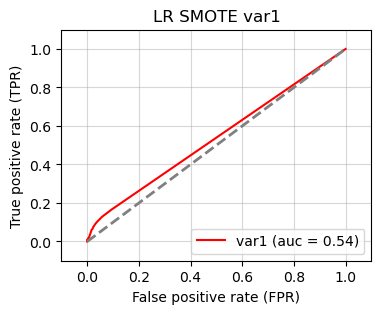

<Figure size 250x250 with 0 Axes>

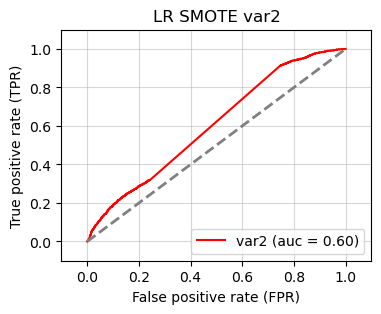

<Figure size 250x250 with 0 Axes>

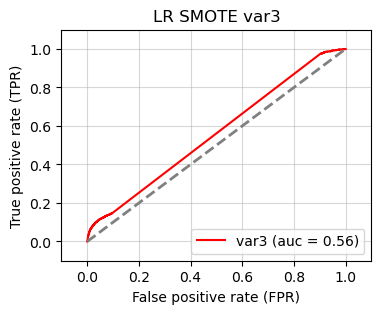

<Figure size 250x250 with 0 Axes>

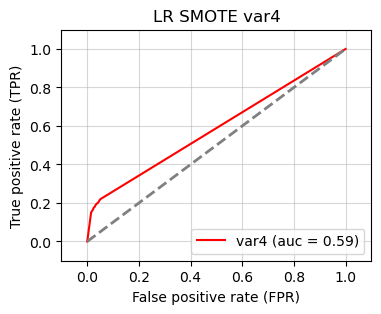

<Figure size 250x250 with 0 Axes>

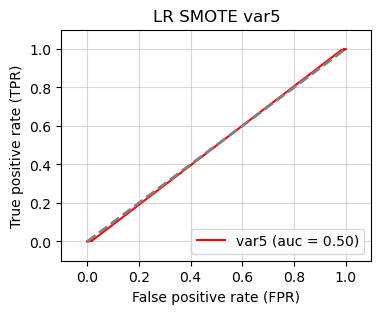

<Figure size 250x250 with 0 Axes>

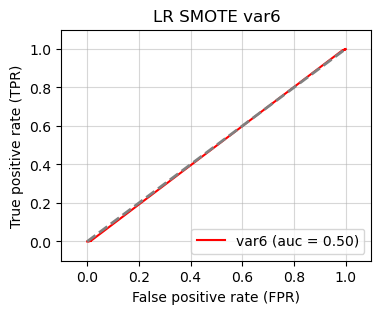

<Figure size 250x250 with 0 Axes>

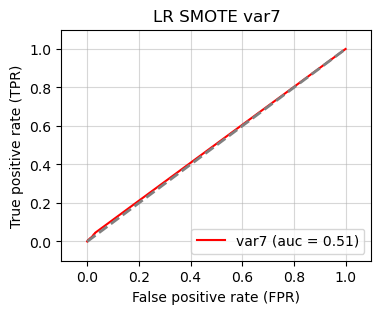

<Figure size 250x250 with 0 Axes>

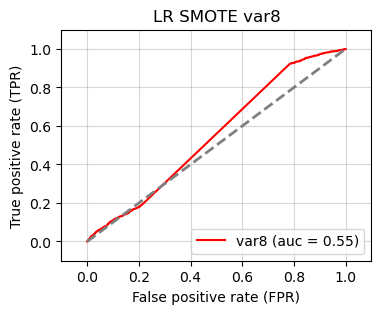

<Figure size 250x250 with 0 Axes>

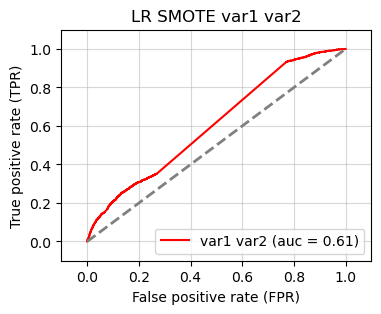

<Figure size 250x250 with 0 Axes>

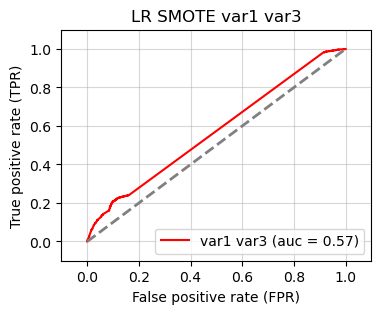

<Figure size 250x250 with 0 Axes>

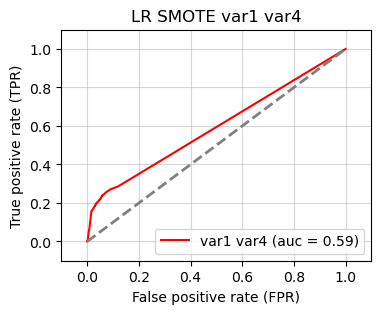

<Figure size 250x250 with 0 Axes>

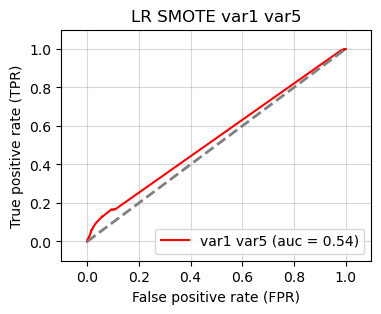

<Figure size 250x250 with 0 Axes>

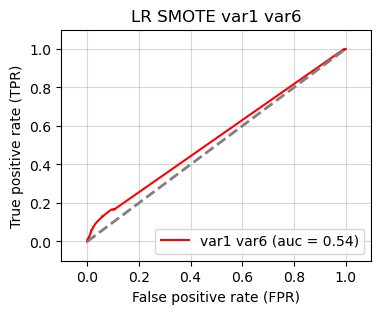

<Figure size 250x250 with 0 Axes>

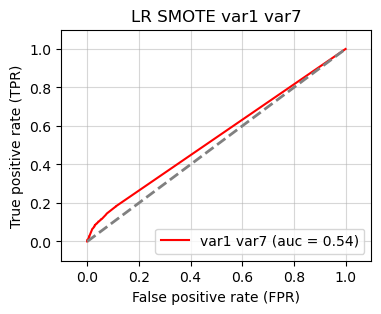

<Figure size 250x250 with 0 Axes>

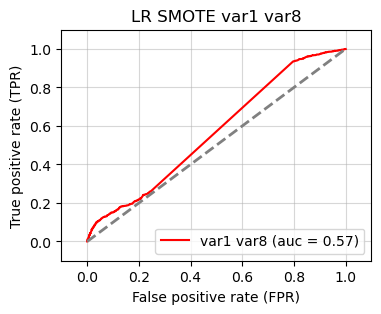

<Figure size 250x250 with 0 Axes>

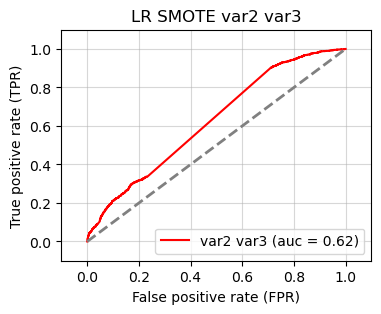

<Figure size 250x250 with 0 Axes>

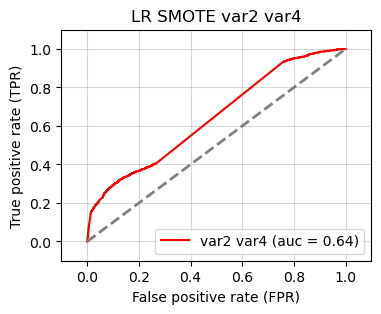

<Figure size 250x250 with 0 Axes>

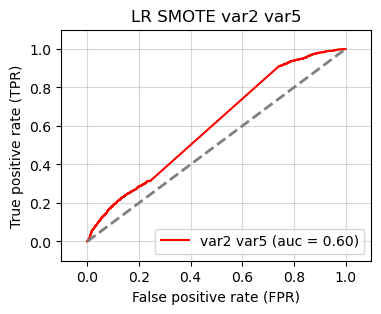

<Figure size 250x250 with 0 Axes>

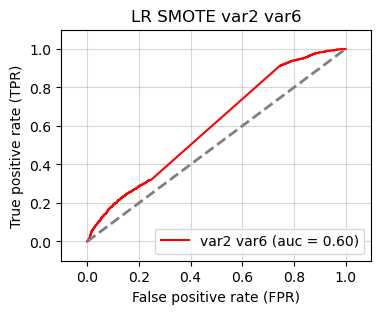

<Figure size 250x250 with 0 Axes>

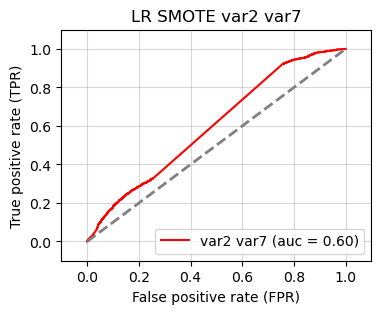

<Figure size 250x250 with 0 Axes>

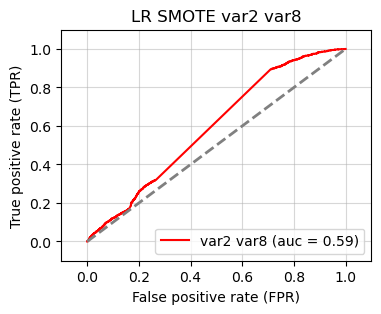

<Figure size 250x250 with 0 Axes>

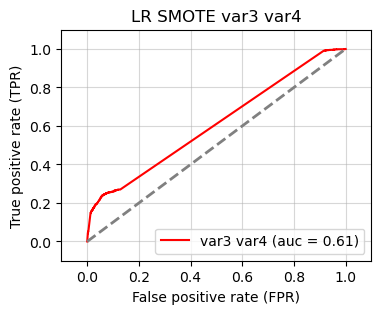

<Figure size 250x250 with 0 Axes>

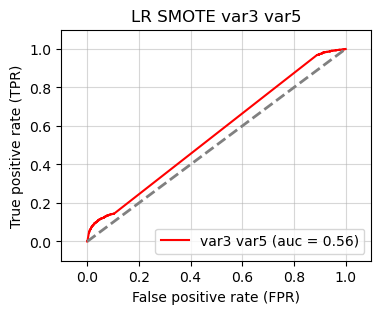

<Figure size 250x250 with 0 Axes>

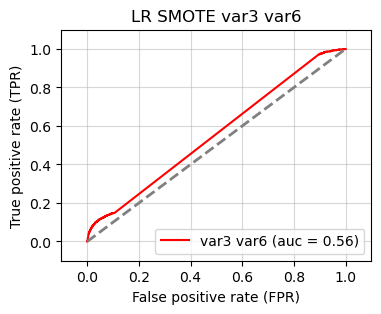

<Figure size 250x250 with 0 Axes>

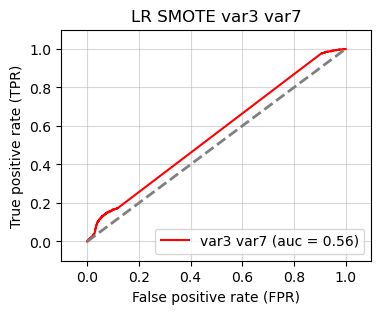

<Figure size 250x250 with 0 Axes>

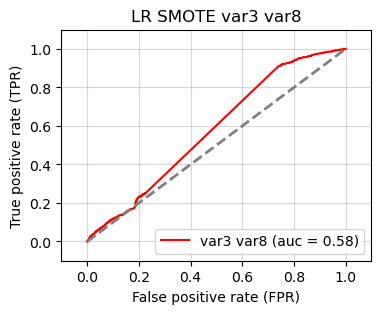

<Figure size 250x250 with 0 Axes>

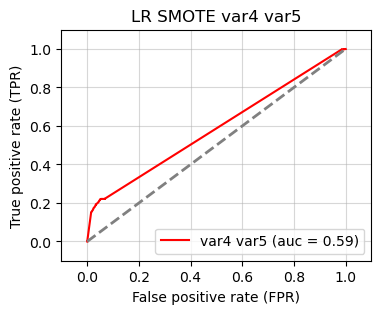

<Figure size 250x250 with 0 Axes>

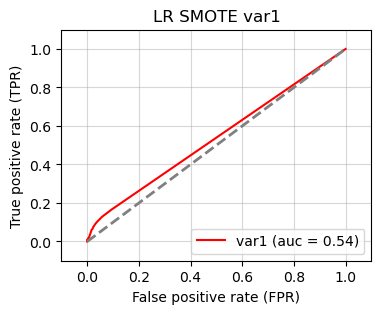

<Figure size 250x250 with 0 Axes>

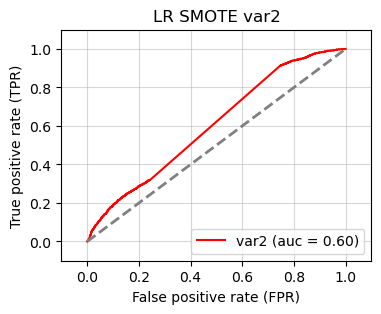

<Figure size 250x250 with 0 Axes>

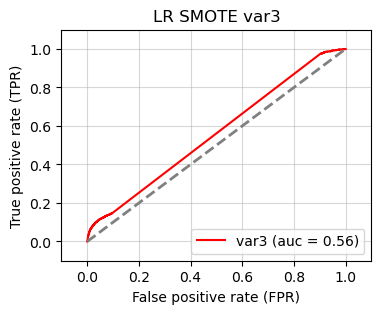

<Figure size 250x250 with 0 Axes>

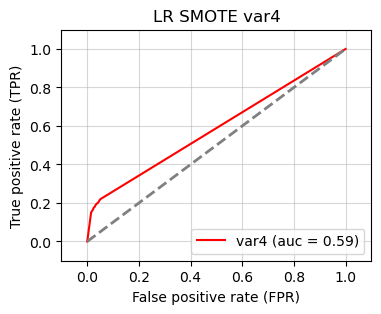

<Figure size 250x250 with 0 Axes>

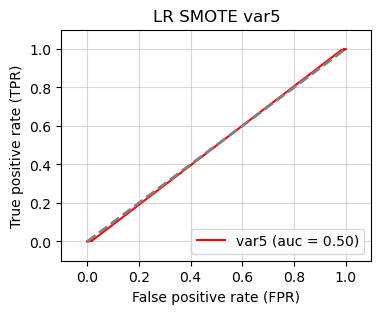

<Figure size 250x250 with 0 Axes>

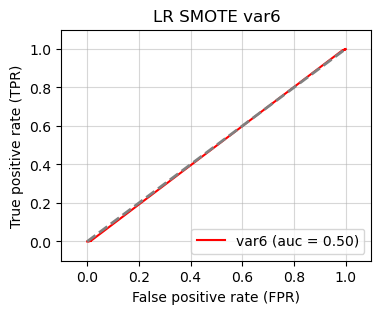

<Figure size 250x250 with 0 Axes>

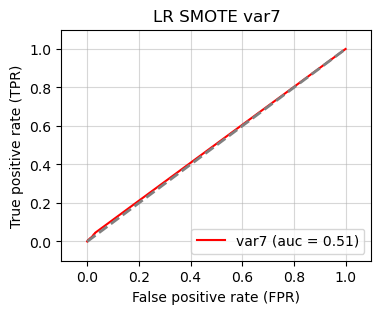

<Figure size 250x250 with 0 Axes>

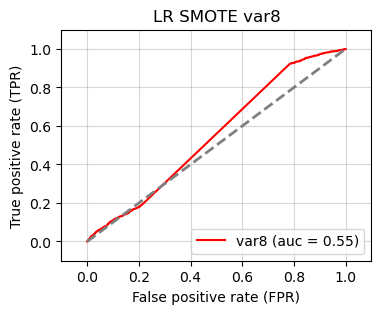

<Figure size 250x250 with 0 Axes>

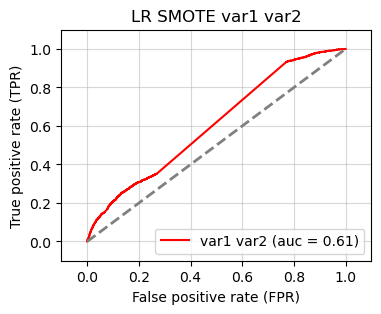

<Figure size 250x250 with 0 Axes>

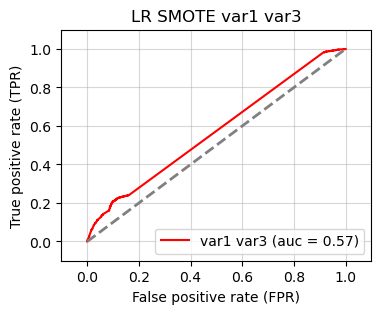

<Figure size 250x250 with 0 Axes>

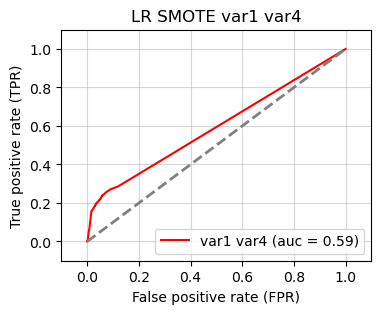

<Figure size 250x250 with 0 Axes>

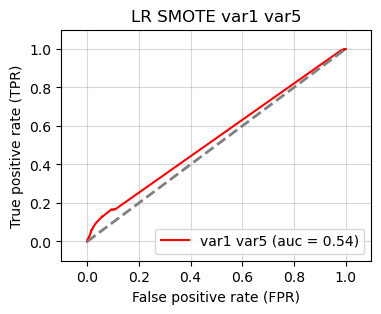

<Figure size 250x250 with 0 Axes>

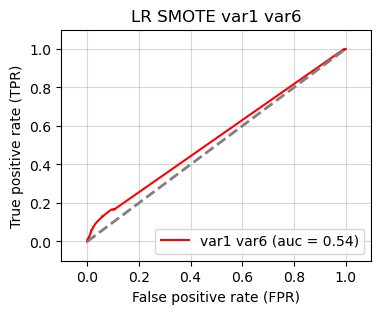

<Figure size 250x250 with 0 Axes>

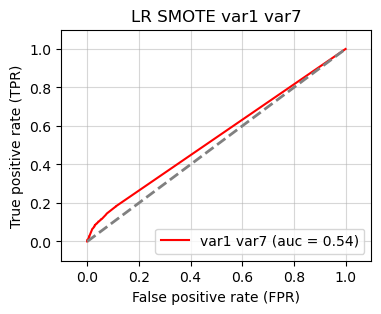

<Figure size 250x250 with 0 Axes>

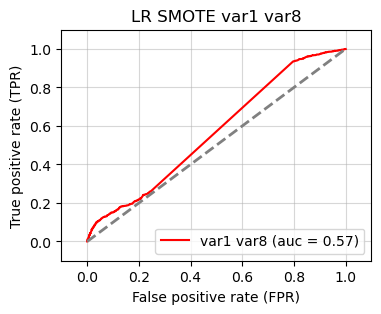

<Figure size 250x250 with 0 Axes>

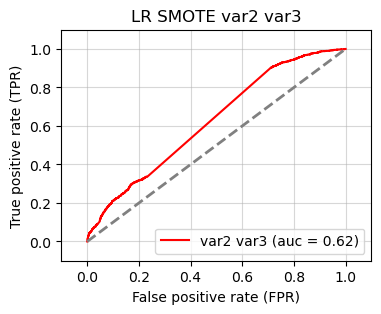

<Figure size 250x250 with 0 Axes>

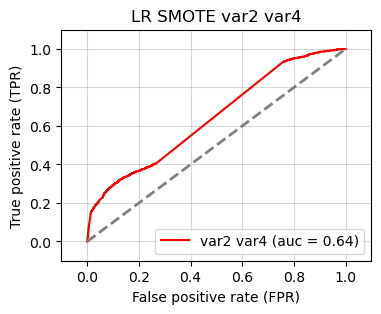

<Figure size 250x250 with 0 Axes>

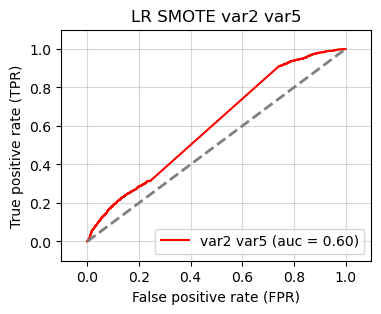

<Figure size 250x250 with 0 Axes>

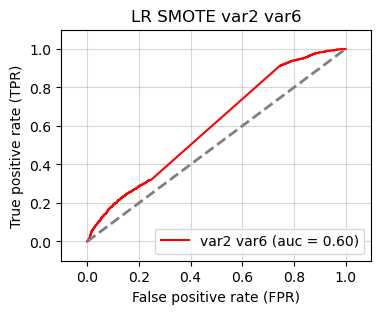

<Figure size 250x250 with 0 Axes>

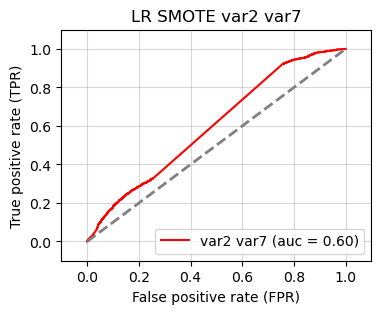

<Figure size 250x250 with 0 Axes>

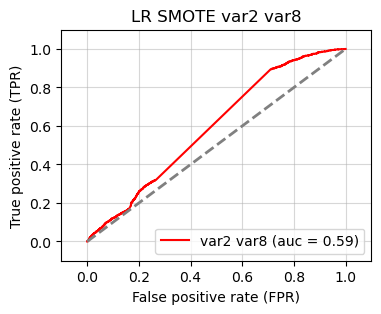

<Figure size 250x250 with 0 Axes>

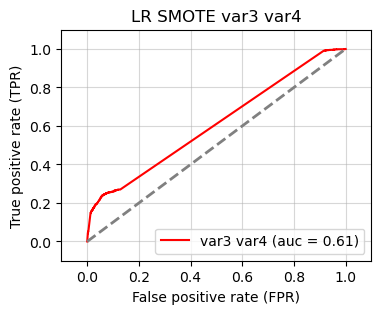

<Figure size 250x250 with 0 Axes>

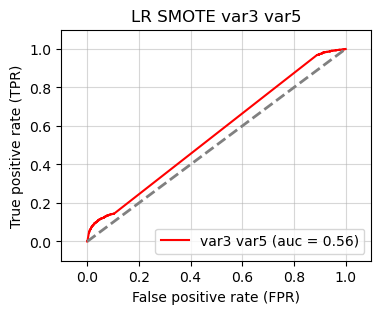

<Figure size 250x250 with 0 Axes>

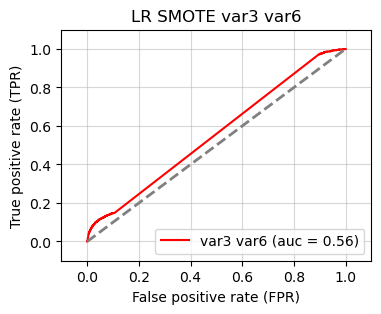

<Figure size 250x250 with 0 Axes>

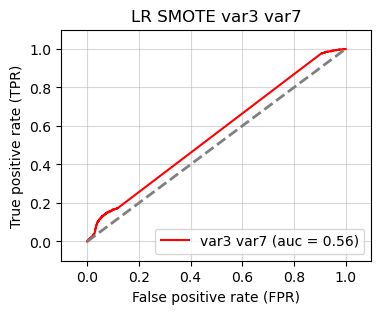

<Figure size 250x250 with 0 Axes>

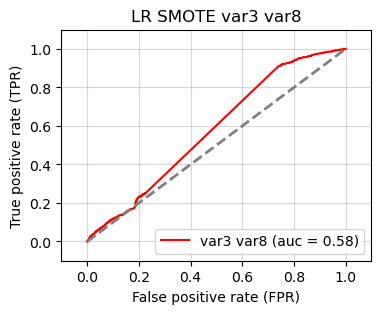

<Figure size 250x250 with 0 Axes>

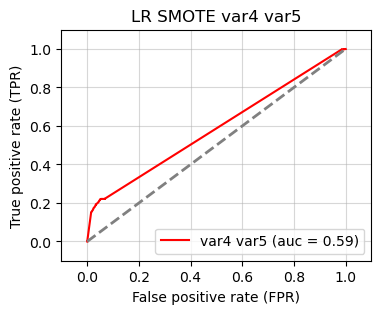

<Figure size 250x250 with 0 Axes>

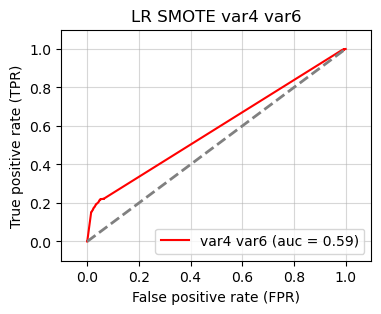

<Figure size 250x250 with 0 Axes>

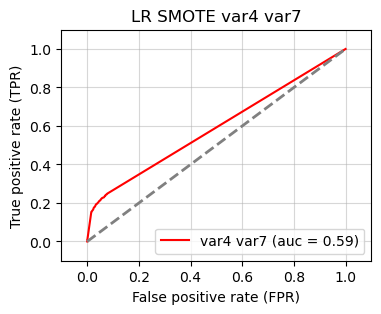

<Figure size 250x250 with 0 Axes>

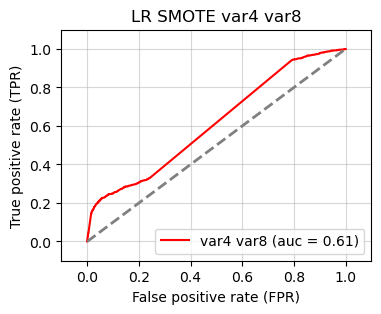

<Figure size 250x250 with 0 Axes>

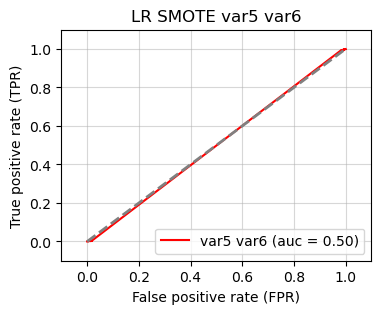

<Figure size 250x250 with 0 Axes>

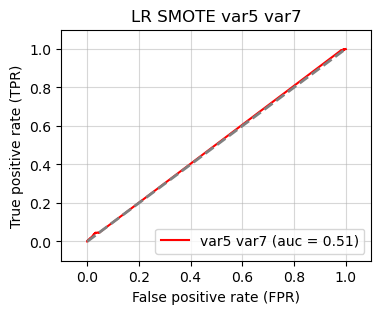

<Figure size 250x250 with 0 Axes>

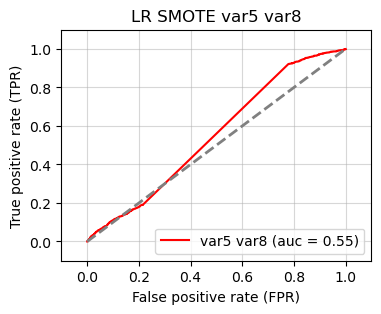

<Figure size 250x250 with 0 Axes>

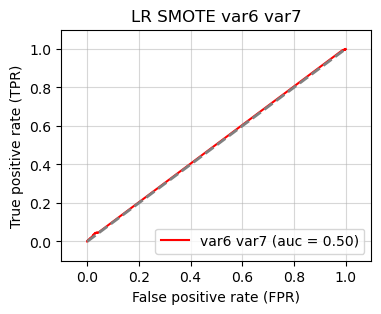

<Figure size 250x250 with 0 Axes>

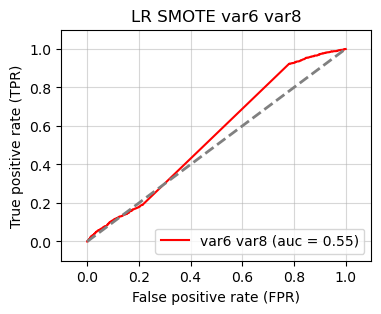

<Figure size 250x250 with 0 Axes>

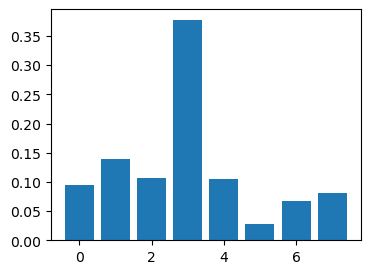

In [35]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.clf() 
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Result table

In credit risk analysis, minimizing false positives is important because it can help reduce the risk of approving a loan that will ultimately default. One way to do this is by using a metric such as precision, which measures the proportion of true positives among all the positive predictions. Precision focuses specifically on the number of correct positive predictions, which means it can be a better metric to use if the goal is to minimize false positives.

Another metric that can be useful in this context is the F1 score, which is a harmonic mean of precision and recall. The F1 score takes into account both false positives and false negatives and can be a good metric to use when both minimizing false positives and false negatives are important.

AUC-ROC stands for Area Under the Receiver Operating Characteristic Curve, which is a performance metric used to evaluate the performance of binary classification models, including those used in credit risk analysis.It provides an overall measure of how well the binary classification model can distinguish between the two classes (i.e. good loans and bad loans). An AUC-ROC score of 0.5 means that the model performs no better than random guessing, while a score of 1.0 indicates perfect discrimination between the two classes.

In [143]:

'''
############
# For interactive pandas table view

#!pip install qgrid

import qgrid
widget = qgrid.show_grid(dfclassification_result,show_toolbar = True)
widget
############
'''

dfclassification_result.sort_values('auc+f1+prec',ascending=False).head(25)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
1534,"var8_woe,var4,var5",0.958072,0.960894,0.959457,0.662885,2.580414,mean,stdscl,upsample,DT
598,"var7_woe,var2,var4",0.957380,0.934532,0.945316,0.659576,2.562273,mean,stdscl,upsample,LR
1994,"var7_woe,var1,var4",0.957493,0.925974,0.940695,0.663307,2.561494,mean,stdscl,SMOTE,LR
592,"var7_woe,var1,var4",0.957492,0.925958,0.940685,0.663053,2.561230,mean,stdscl,upsample,LR
869,"var2,var3,var4",0.957424,0.934499,0.945315,0.657470,2.560209,mean,stdscl,upsample,LR
2256,"var1,var3,var4",0.957587,0.925706,0.940581,0.661916,2.560084,mean,stdscl,SMOTE,LR
116,"var2,var4",0.957378,0.934499,0.945297,0.657095,2.559770,mean,stdscl_WOE-ori,upsample,LR
324,"var2,var4",0.957378,0.934499,0.945297,0.657095,2.559770,mean,stdscl,upsample,LR
664,"var5_woe,var2,var4",0.957378,0.934499,0.945297,0.657095,2.559770,mean,stdscl,upsample,LR
719,"var6_woe,var2,var4",0.957378,0.934499,0.945297,0.657095,2.559770,mean,stdscl,upsample,LR


Based on the analysis, the best combination of variables is var8_woe, var4, and var5. This combination has a precision score of 0.958, indicating that 95.8% of loans that the model predicts as good are actually good loans. The F1 score of 0.9595, which is the harmonic mean of precision and recall, provides a combined measure of precision and recall for the model.

Moreover, the AUC score of 0.6629, which is the area under the ROC curve, provides a measure of how well the model distinguishes between good and bad loans. A higher AUC score indicates that the model is better at separating good and bad loans.

The value of auc+f1+precision is 2.5804, which is the sum of AUC, F1 score, and precision. This value is often used as an overall performance metric to compare different models or different combinations of variables. In this case, the value of 2.5804 suggests that the model is performing relatively well across all three metrics.

When compared to the credit default rate of 2.5%, the results suggest that the model is performing relatively well at identifying good loans. The precision score of 0.958 indicates that the model is correctly identifying a high proportion of good loans, which means that the risk of approving a bad loan is relatively low.

In [60]:
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

save result

In [140]:
dfclassification_result.to_csv(date+'classification_result.csv')

In [126]:
dfclassification_result['prec_f1']=dfclassification_result['f1']*dfclassification_result['precision']

In [36]:
dfclassification_result[dfclassification_result['f1']<.95].sort_values('f1',ascending=False).head(10)

,variable,precision,recall,f1
2,var3_woe,0.953194,0.901506,0.925939
76,"var3_woe,var5_woe,var6_woe",0.953194,0.901506,0.925939
23,"var3_woe,var6_woe",0.953194,0.901506,0.925939
22,"var3_woe,var5_woe",0.953194,0.901506,0.925939
54,"var1_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076
52,"var1_woe,var5_woe,var7_woe",0.953651,0.894220,0.922076
123,"var1_woe,var5_woe,var6_woe,var7_woe",0.953651,0.894220,0.922076
13,"var1_woe,var7_woe",0.953651,0.894220,0.922076
0,var1_woe,0.953579,0.887622,0.918409
51,"var1_woe,var5_woe,var6_woe",0.953579,0.887622,0.918409


0      True
1      True
2      True
3      True
4      True
       ... 
250    True
251    True
252    True
253    True
254    True
Name: f1, Length: 255, dtype: bool

In [26]:
dfclassification_result=pd.read_csv('classification_result.csv',index_col=0)


In [15]:
#dfclassification_result['prec_f1']=dfclassification_result['f1']*dfclassification_result['precision']
dfclassification_result.sort_values('precision',ascending=False).head(10)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
44,"var1,var2",0.971875,0.093503,0.129734,0.571076,1.672685,mean,stdscl,SMOTE,DT
129,"var3,var4",0.971483,0.106265,0.151875,0.462283,1.585641,median,stdscl,SMOTE,DT
95,"var3,var6",0.970863,0.102480,0.145454,0.556761,1.673078,median,stdscl,SMOTE,LR
74,var3,0.970859,0.102413,0.145339,0.558782,1.674980,median,stdscl,SMOTE,LR
117,"var1,var3",0.970273,0.108845,0.156434,0.578893,1.705600,median,stdscl,SMOTE,DT
94,"var3,var5",0.970199,0.107722,0.154530,0.557564,1.682293,median,stdscl,SMOTE,LR
110,var3,0.969480,0.113601,0.164608,0.563664,1.697752,median,stdscl,SMOTE,DT
132,"var3,var7",0.969390,0.114874,0.166768,0.571077,1.707234,median,stdscl,SMOTE,DT
123,"var2,var3",0.969139,0.162605,0.243760,0.582720,1.795618,median,stdscl,SMOTE,DT
124,"var2,var4",0.968973,0.227353,0.338124,0.517291,1.824388,median,stdscl,SMOTE,DT


In [172]:
dfclassification_result.sort_values('f1',ascending=False).head(10)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
246,"var5,var6",0.950616,0.974995,0.962651,0.489425,2.402692,mean,minmax,SMOTE,LR
221,var6,0.950616,0.974995,0.962651,0.492564,2.405831,mean,minmax,SMOTE,LR
149,var6,0.950616,0.974995,0.962651,0.492564,2.405831,median,minmax,SMOTE,LR
174,"var5,var6",0.950616,0.974995,0.962651,0.489425,2.402692,median,minmax,SMOTE,LR
220,var5,0.950616,0.974995,0.962651,0.489725,2.402992,mean,minmax,SMOTE,LR
148,var5,0.950616,0.974995,0.962651,0.489725,2.402992,median,minmax,SMOTE,LR
185,var6,0.950614,0.974912,0.962610,0.499948,2.413172,median,minmax,SMOTE,DT
257,var6,0.950614,0.974912,0.962610,0.499948,2.413172,mean,minmax,SMOTE,DT
113,var6,0.950603,0.974443,0.962375,0.498429,2.411407,median,stdscl,SMOTE,DT
112,var5,0.950912,0.973689,0.962029,0.501722,2.414663,median,stdscl,SMOTE,DT


In [171]:
dfclassification_result.sort_values('recall',ascending=False).head(10)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
174,"var5,var6",0.950616,0.974995,0.962651,0.489425,2.402692,median,minmax,SMOTE,LR
148,var5,0.950616,0.974995,0.962651,0.489725,2.402992,median,minmax,SMOTE,LR
149,var6,0.950616,0.974995,0.962651,0.492564,2.405831,median,minmax,SMOTE,LR
220,var5,0.950616,0.974995,0.962651,0.489725,2.402992,mean,minmax,SMOTE,LR
221,var6,0.950616,0.974995,0.962651,0.492564,2.405831,mean,minmax,SMOTE,LR
246,"var5,var6",0.950616,0.974995,0.962651,0.489425,2.402692,mean,minmax,SMOTE,LR
257,var6,0.950614,0.974912,0.962610,0.499948,2.413172,mean,minmax,SMOTE,DT
185,var6,0.950614,0.974912,0.962610,0.499948,2.413172,median,minmax,SMOTE,DT
113,var6,0.950603,0.974443,0.962375,0.498429,2.411407,median,stdscl,SMOTE,DT
112,var5,0.950912,0.973689,0.962029,0.501722,2.414663,median,stdscl,SMOTE,DT
